In [4]:
import csv
import matplotlib.pyplot as plt
from textblob import TextBlob

In [5]:
csv_file_path = "/content/psalm_text.csv"  # CSV file path

###EDA

In [16]:
import pandas as pd

df = pd.read_csv(csv_file_path)

# Average length of verses
avg_verse_length = df['Psalm Text'].apply(len).mean()
print("Average length of verses", avg_verse_length)

Average length of verses 89.90004063388866


In [19]:
import string

# Remove punctuation from unique words
unique_words = df['Psalm Text'].apply(lambda x: set(word.strip(string.punctuation) for word in x.split())).explode().unique()

# Filter out empty strings
unique_words = [word for word in unique_words if word]

print("Unique Words:", unique_words)


Unique Words: ['nor', 'way', 'ungodly', 'is', 'man', 'walketh', 'counsel', 'of', 'standeth', 'sinners', 'that', 'seat', 'not', 'scornful', 'in', 'sitteth', 'the', 'Blessed', 'day', 'and', 'delight', 'doth', 'law', 'meditate', 'LORD', 'But', 'he', 'night', 'his', 'fruit', 'a', 'planted', 'like', 'prosper', 'by', 'tree', 'wither', 'And', 'doeth', 'whatsoever', 'rivers', 'season', 'leaf', 'water', 'be', 'forth', 'bringeth', 'shall', 'also', 'so', 'The', 'chaff', 'which', 'driveth', 'wind', 'but', 'are', 'away', 'congregation', 'stand', 'Therefore', 'judgment', 'righteous', 'perish', 'knoweth', 'For', 'heathen', 'rage', 'Why', 'thing', 'vain', 'imagine', 'people', 'do', 'against', 'together', 'anointed', 'earth', 'set', 'themselves', 'kings', 'rulers', 'saying', 'take', 'asunder', 'cords', 'Let', 'their', 'from', 'cast', 'bands', 'break', 'us', 'derision', 'have', 'He', 'heavens', 'them', 'laugh', 'sore', 'Then', 'speak', 'vex', 'wrath', 'displeasure', 'unto', 'my', 'king', 'holy', 'I', 'Y

###Sentiment Analysis

In [6]:
# Load the Psalms data from the CSV file
with open(csv_file_path, mode="r", encoding="utf-8") as file:
    reader = csv.reader(file)

    next(reader, None)  # Skipping the header
    psalms_data = [row[0] for row in reader]

# Perform sentiment analysis using TextBlob
sentiments = [TextBlob(verse).sentiment.polarity for verse in psalms_data]

# sentiments

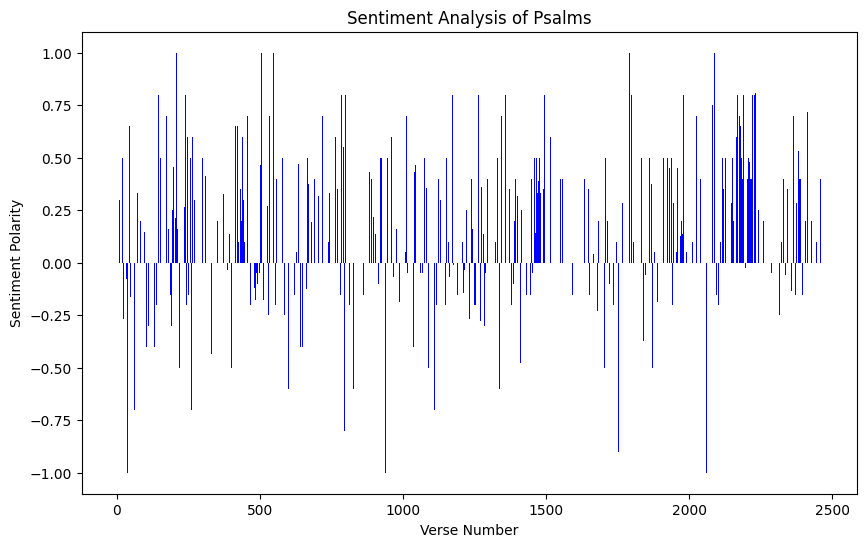

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sentiments) + 1), sentiments, color="blue")
plt.xlabel("Verse Number")
plt.ylabel("Sentiment Polarity")
plt.title("Sentiment Analysis of Psalms")
plt.show()

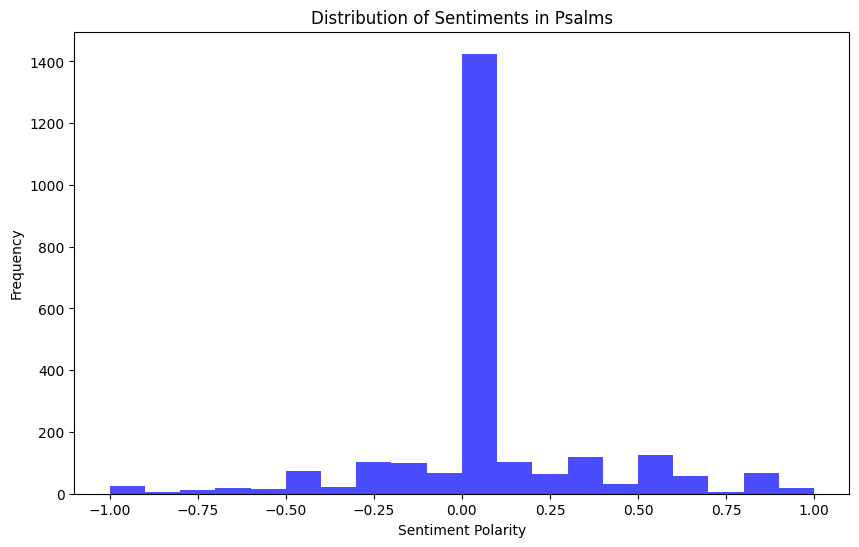

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=20, color="blue", alpha=0.7)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiments in Psalms")
plt.show()

In [9]:
sum(sentiments)

139.50283083120559

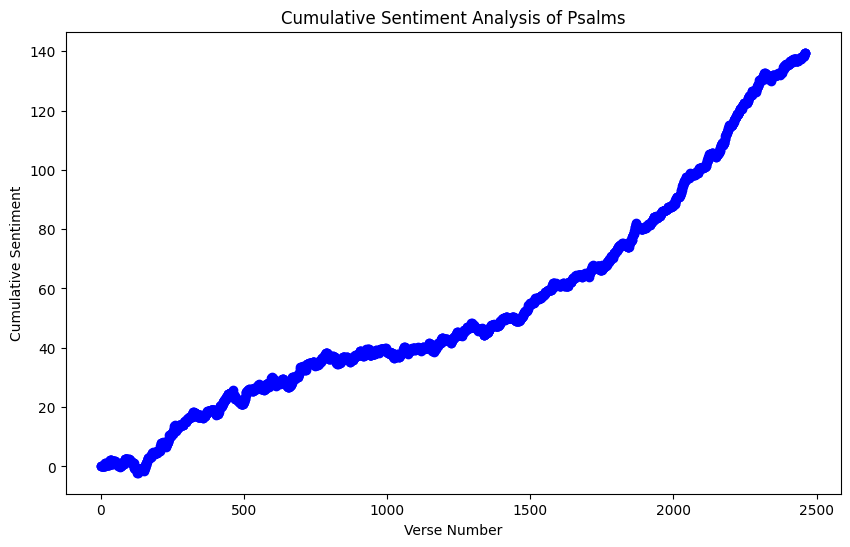

In [10]:
plt.figure(figsize=(10, 6))
cumulative_sentiments = [sum(sentiments[:i+1]) for i in range(len(sentiments))]
plt.plot(range(1, len(sentiments) + 1), cumulative_sentiments, marker='o', linestyle='-', color='blue')
plt.xlabel("Verse Number")
plt.ylabel("Cumulative Sentiment")
plt.title("Cumulative Sentiment Analysis of Psalms")
plt.show()

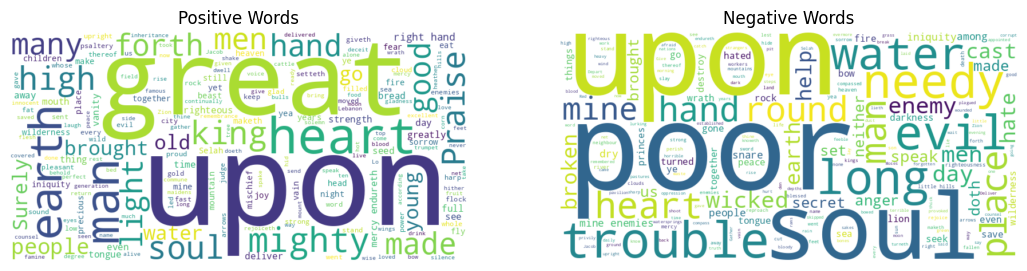

In [12]:
from wordcloud import WordCloud

# Filter out specific words
exclude_words = ["God", "Lord", "thee", "thy", "thou", "unto", "will", "let", "hath", "may"]

positive_words = " ".join([verse for verse, sentiment in zip(psalms_data, sentiments) if sentiment > 0 and all(word.lower() not in verse.lower() for word in exclude_words)])
negative_words = " ".join([verse for verse, sentiment in zip(psalms_data, sentiments) if sentiment < 0 and all(word.lower() not in verse.lower() for word in exclude_words)])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_words)

# Plot word clouds
plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Positive Words")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Negative Words")
plt.axis("off")

plt.show()